## Information Retrieval and NLP

Information Retrieval(IR) is not only an important part of text Data Mining but it also has an extensive application in Natural Language Processing(NLP). This is because every NLP pipiline implements text normalization as an important preprocessing step.

A few important definitions before we get started:

- A **word** is a string of characters that appears in a text/sentence/paragraph, etc. (We all know this one!)
- A **term** is a normalized word i.e. a word that has gone through preprocessing. For example: "studying"(A word) becomes "study"(A term after a certain kind of normalization).
- A **token** can be thought of a unique instance of a word or a term. For example, the set {'hannah','is','the','queen','of','the','Kingdom'} has 7 words but 6 tokens(because 'the' is repeated).
- Two words are of the same **type** if they fall under the same equivalence class or become the same term after normalization. For example, Studies, Study and Studying could be of the same type after performing some kind of normalization.


### Why perform normalization?
Because we want to retreieve all documents relevant to the user's query. For example, ff the user searches for "U.S.A" not only do we want all documents with that specific query, we may also want documents with "USA" and "United States of America" and "North America" and maybe even "the States"!

This notebook will walk you through some commonly used methods for text normalization and IR. We will be using te 'Disaster Tweets" dataset from Kaggle which can be found at: https://www.kaggle.com/datasets/vstepanenko/disaster-tweets

Enjoy!

In [40]:
# let's import necessary libraries

# nltk stands for Natural Language Tookit. this library is commonly used for text normalization
import nltk

# for arrays and dataframes
import numpy as np     
import pandas as pd    

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [41]:
# let's import the disaster tweets dataset from Kaggle

df_train = pd.read_csv('Data\\disaster_tweets_kaggle\\train.csv', index_col = False)
df_test = pd.read_csv('Data\\disaster_tweets_kaggle\\test.csv', index_col = False)

df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [43]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<AxesSubplot:>

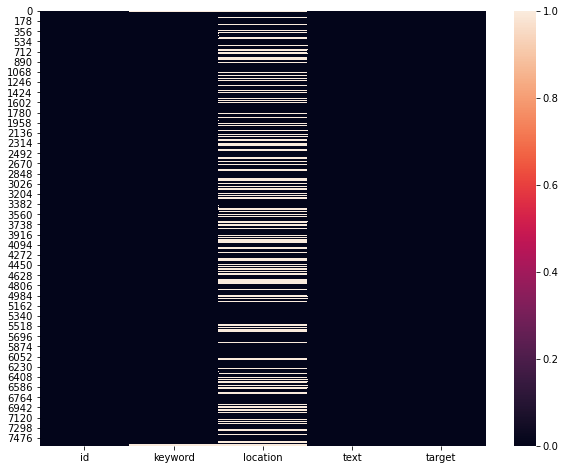

In [44]:
# let's visualize the missing values
plt.figure(figsize = (10,8))
sns.heatmap(df_train.isnull(), cmap = "rocket")

id             0
keyword       26
location    1105
text           0
dtype: int64


<AxesSubplot:>

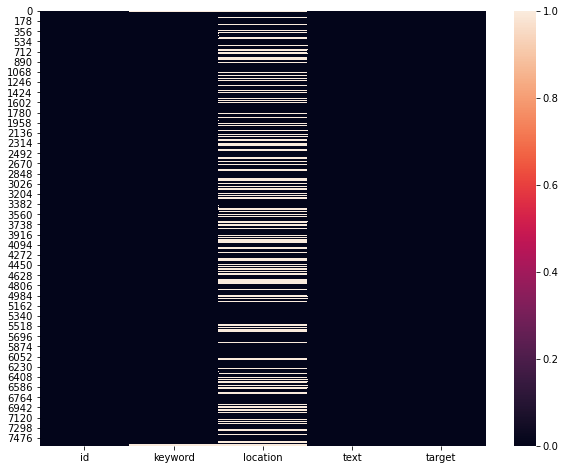

In [45]:
# let's check the test data
print(df_test.isnull().sum())
plt.figure(figsize = (10,8))
sns.heatmap(df_train.isnull(), cmap = "rocket")

In [46]:
# since there are too many missing valus for column 'location' we will drop this
df_train.drop(labels = ['location'], axis = 1, inplace = True)
df_test.drop(labels = ['location'], axis = 1, inplace = True)

In [59]:
# to deal with missing values in "keyword" let's look at the mst common keywords
df_train.groupby('keyword').count().sort_values(by = 'target', ascending = False).head(20)

,id,text,target
keyword,,,
fatalities,45,45,45
deluge,42,42,42
armageddon,42,42,42
sinking,41,41,41
damage,41,41,41
harm,41,41,41
body%20bags,41,41,41
outbreak,40,40,40
evacuate,40,40,40


In [66]:
# save keywords as a list but we only wate keywords that are not null
keywords = list((df_train[df_train['keyword'].isnull() == False]['keyword']).unique())

In [68]:
# check length to confirm only unique words are present
len(keywords)

221

In [28]:
'''
We can see that all keywords above are linked with disaster. Now let's take a look at the tweets with missing
keywords to see it we can extract them using this info.
'''
df_train[df_train['keyword'].isnull()]['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 61, dtype: object